In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [162]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

# AIRbnb 데이터 분석

## Todo

### 전처리
 - null값 체크
 - 중복값 체크
 - 잘못된 값 삭제
 - 필요없는 값 삭제

### 분석
 - MI: target
 - title 살펴보고 NLP작업

In [5]:
df = pd.read_excel('./data/airbnb.xlsx')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

# object factorize 하기 전에 null 데이터 확인

침대수 없는 데이터 살펴보기. 값을 어떻게 채울까?
- 총 85개.
- median값으로 

In [ ]:
# 침대수 null 값 살펴보기
# Name에서 침대수 정보를 알 수 있을까? -> 부분적으로 알 수 있음

df[df['Beds'].isna()] # beds 값 없는 애들만 살펴보기
no_bed_info = df[df['Beds'].isna()]
no_bed_info[no_bed_info['Name'].str.contains('Bed|bed|br|bd', regex=True)] #Name에 beds값 정보가 있는가?

In [ ]:
# media 값으로 채워넣기

beds_meidan = df.groupby(['Property Type'])[['Beds']].median()
for p_type in beds_meidan.index:
    df[df['Property Type']==p_type] = df[df['Property Type']==p_type].fillna(beds_meidan.loc[p_type]['Beds'])

df.info()

Property Type 3개 null -> Other로 채워넣기

In [83]:
df['Property Type'] = df['Property Type'].fillna('Other')

Review Scores Rating (bin) 없는 데이터는 1개 -> 삭제

In [85]:
df[df['Review Scores Rating (bin)'].isna()] # df[df['Review Scores Rating'].isna()]

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
20551,16915992,2014-06-17 00:00:00,Entire home/apt in New York,Manhattan,Other,NaN,Entire home/apt,10002.0,2.0,1,0,120,NaN


In [89]:
df = df.dropna()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30477 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30477 non-null  int64  
 1   Host Since                  30477 non-null  object 
 2   Name                        30477 non-null  object 
 3   Neighbourhood               30477 non-null  object 
 4   Property Type               30477 non-null  object 
 5   Review Scores Rating (bin)  30477 non-null  float64
 6   Room Type                   30477 non-null  object 
 7   Zipcode                     30477 non-null  float64
 8   Beds                        30477 non-null  float64
 9   Number of Records           30477 non-null  int64  
 10  Number Of Reviews           30477 non-null  int64  
 11  Price                       30477 non-null  int64  
 12  Review Scores Rating        30477 non-null  float64
dtypes: float64(4), int64(4), object

MI 구하는데 필요없는 값들 제외
- Host Id
- Host Since
- Review Scores Rating (bin)
- Number of Records
- Name


In [210]:
X = df.copy()
X.columns
X = X.drop(labels=['Host Id', 'Host Since', 'Name','Review Scores Rating (bin)','Number of Records'], axis=1)

object 값, zipcode factorize(카테고리화) 하기

In [95]:
X.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30477 entries, 0 to 30477
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Neighbourhood   30477 non-null  object
 1   Property Type   30477 non-null  object
 2   Room Type       30477 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [27]:
X['Property Type'].drop_duplicates()

0              Apartment
13                 House
38                 Other
50       Bed & Breakfast
59                  Loft
101          Condominium
353            Townhouse
433                  NaN
441                 Dorm
521                 Boat
1553               Cabin
3103               Villa
3848            Bungalow
9549           Camper/RV
10015          Treehouse
13172               Tent
13817                Hut
14200         Lighthouse
14847             Chalet
15565             Castle
Name: Property Type, dtype: object

In [211]:
# Property type null값 Other로 
X['Property Type'] = X['Property Type'].fillna('Other')
X.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30477 entries, 0 to 30477
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighbourhood  30477 non-null  object
 1   Property Type  30477 non-null  object
 2   Room Type      30477 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


Name 제외한 object값들 -> category 값으로 변경

In [212]:
for col in X.select_dtypes("object"):
    print(col)
    X[col], _ = X[col].factorize()
X['Zipcode'], _ = X['Zipcode'].factorize()
X['Beds'], _ = X['Beds'].factorize()

Neighbourhood
Property Type
Room Type


In [213]:
X['Review Scores Rating'] = X['Review Scores Rating'].astype('int')

In [214]:
X

,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating
0,0,0,0,0,0,0,145,1
1,0,0,1,1,0,1,37,1
2,1,0,1,2,0,1,28,1
3,1,0,0,3,1,0,199,1
4,1,0,1,4,1,39,549,96
...,...,...,...,...,...,...,...,...
30473,2,0,0,68,4,0,300,1
30474,0,0,1,79,2,0,125,1
30475,0,2,1,1,0,0,80,1
30476,1,0,1,14,0,0,35,1


In [215]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
discrete_features

Neighbourhood           True
Property Type           True
Room Type               True
Zipcode                 True
Beds                    True
Number Of Reviews       True
Price                   True
Review Scores Rating    True
dtype: bool

In [107]:
y = X.pop('Price')

In [108]:
X

,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number Of Reviews,Review Scores Rating
0,0,0,0,0,0,0,1
1,0,0,1,1,0,1,1
2,1,0,1,2,0,1,1
3,1,0,0,3,1,0,1
4,1,0,1,4,1,39,96
...,...,...,...,...,...,...,...
30473,2,0,0,68,4,0,1
30474,0,0,1,79,2,0,1
30475,0,2,1,1,0,0,1
30476,1,0,1,14,0,0,1


# MI score  확인

In [111]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [209]:
X

,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number Of Reviews,Review Scores Rating
0,0,0,0,0,0,0,1
1,0,0,1,1,0,1,1
2,1,0,1,2,0,1,1
3,1,0,0,3,1,0,1
4,1,0,1,4,1,39,96
...,...,...,...,...,...,...,...
30473,2,0,0,68,4,0,1
30474,0,0,1,79,2,0,1
30475,0,2,1,1,0,0,1
30476,1,0,1,14,0,0,1


In [112]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:3]  # show a few features with their MI scores

Room Type    0.319625
Zipcode      0.242479
Beds         0.111568
Name: MI Scores, dtype: float64

feature가 price와 관계가 그리 커보이진 않는다

In [113]:
mi_scores

Room Type               0.319625
Zipcode                 0.242479
Beds                    0.111568
Neighbourhood           0.086793
Review Scores Rating    0.024832
Property Type           0.023130
Number Of Reviews       0.018364
Name: MI Scores, dtype: float64

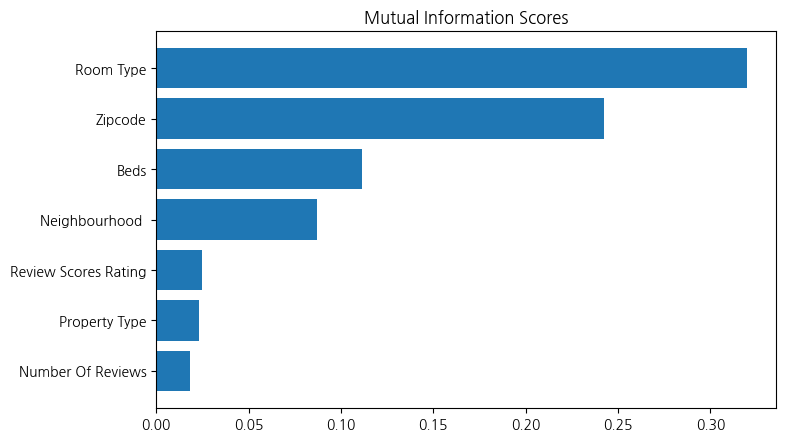

In [115]:
import numpy as np 
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Room type이 어느정도 price에 영향을 미치더라도 Entire home/apt 가 price 분산이 커서 price 예측이 쉽진 않을 것 같다

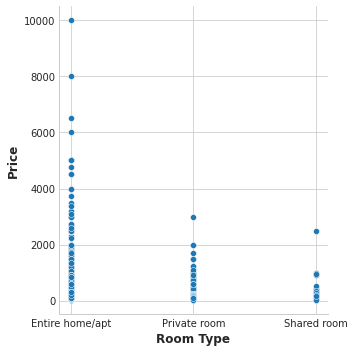

In [203]:
sns.relplot(x="Room Type", y="Price", data=df);
#sns.lmplot(x="Room Type", y="Price", data=df);

In [181]:
df = df.rename(columns={'Neighbourhood ':'Neighbourhood'})

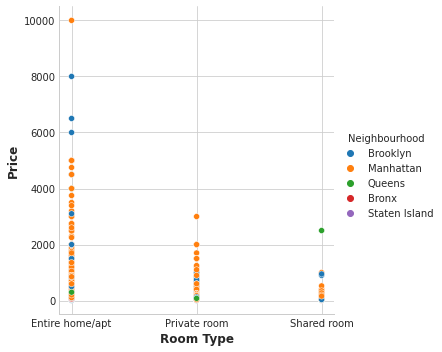

In [186]:
sns.relplot(x="Room Type", y="Price", hue='Neighbourhood', data=df);

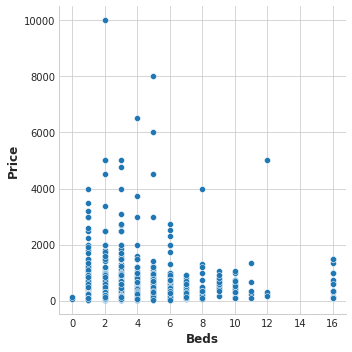

In [201]:
sns.relplot(x="Beds", y="Price", data=df); # , hue='Neighbourhood'

In [182]:
df[['Price','Neighbourhood']]

,Price,Neighbourhood
0,145,Brooklyn
1,37,Brooklyn
2,28,Manhattan
3,199,Manhattan
4,549,Manhattan
...,...,...
30473,300,Queens
30474,125,Brooklyn
30475,80,Brooklyn
30476,35,Manhattan


In [ ]:
sns.relplot(x="Room Type", y="Price", hue='Neighbourhood', data=df);

# 앙상블 모델로 위의 feature들로 price 예측해보기

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state=23, n_estimators=1000)
neg_mse_score = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_scores)


In [125]:
rmse_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_scores)


In [126]:
print('5 교차 검증의 개별 Negative MSE score: ', np.round(neg_mse_score,2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE scores: {0:.4f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE score:  [-41734.66 -20146.48 -52311.53 -35096.19 -28923.05]
5 교차 검증의 개별 RMSE scores:  [204.29 141.94 228.72 187.34 170.07]
5 교차 검증의 평균 RMSE scores: 186.4707


In [143]:
X.columns

Index(['Neighbourhood ', 'Property Type', 'Room Type', 'Zipcode', 'Beds',
       'Number Of Reviews', 'Review Scores Rating'],
      dtype='object')

In [204]:
rf.fit(X[['Neighbourhood ','Room Type', 'Zipcode', 'Beds']], y)

RandomForestRegressor(n_estimators=1000, random_state=23)

In [145]:
MI_top4 = X[['Neighbourhood ','Room Type', 'Zipcode', 'Beds']]

<AxesSubplot:ylabel='Price'>

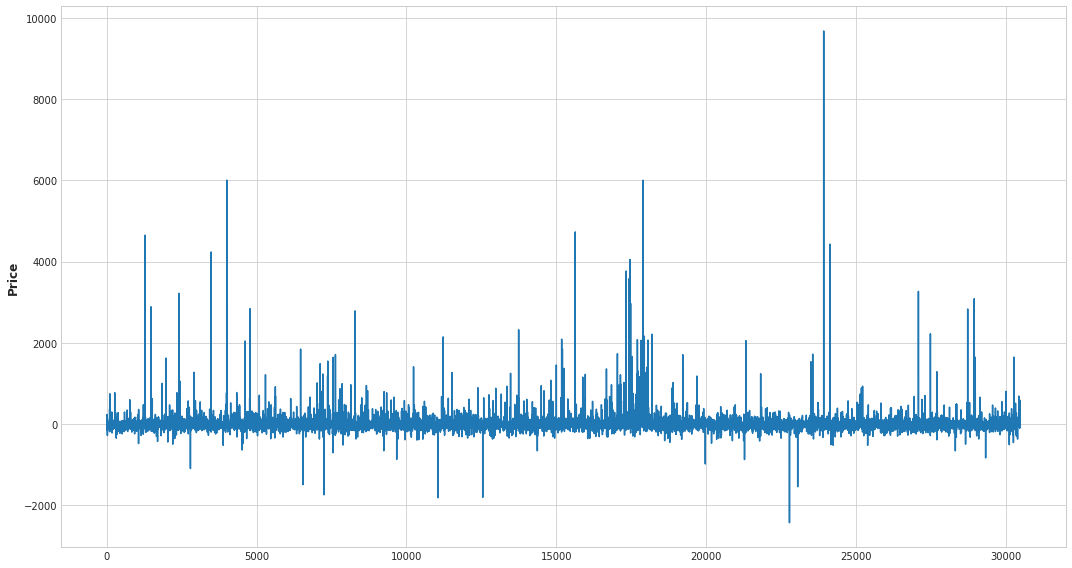

In [205]:
pred1 = rf.predict(MI_top4)
fig = plt.figure(figsize=(15,8))
sns.lineplot(x=MI_top4.index, y=y-pred1)

#ax = sns.relplot(x=MI_top4.index, y=pred, ax=ax)

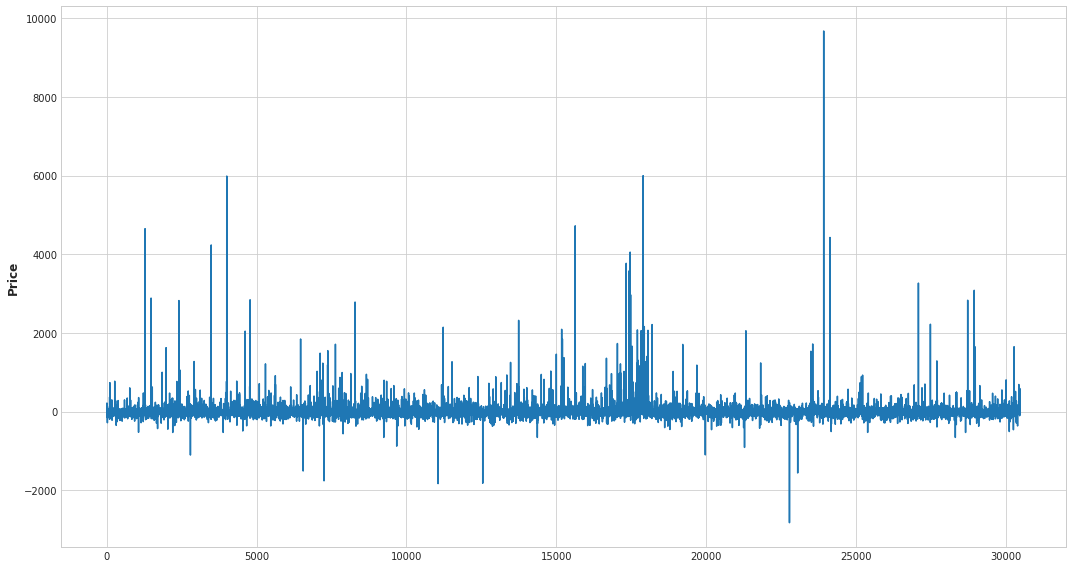

In [206]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=1000)
xgb_reg.fit(MI_top4,y)
pred2 = xgb_reg.predict(MI_top4)
fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x=MI_top4.index, y=y-pred2)

밑의 교차검층의 결과는 XGB 모델이 랜덤포레스트보다 약간 더 안 좋다.

In [199]:
neg_mse_score = cross_val_score(xgb_reg, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE score: ', np.round(neg_mse_score,2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE scores: {0:.4f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE score:  [-47532.32 -24837.27 -53035.25 -39662.53 -31998.48]
5 교차 검증의 개별 RMSE scores:  [218.02 157.6  230.29 199.15 178.88]
5 교차 검증의 평균 RMSE scores: 196.7894


랜덤포레스트와 XGB 모델 결과가 너무 비슷해서 pred끼리 차를 구해보았다. 차이가 있긴 있네..

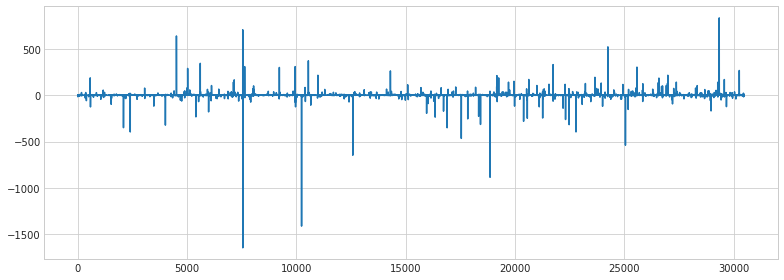

In [207]:
ax = sns.lineplot(x=MI_top4.index, y=pred1-pred2)

# ROOM TYPE 분류 해보기


In [217]:
X_ = X.copy()
y = X_.pop('Room Type')

클래스간 차이가 너무 많이 난다..ㅠ

<AxesSubplot:xlabel='Room Type'>

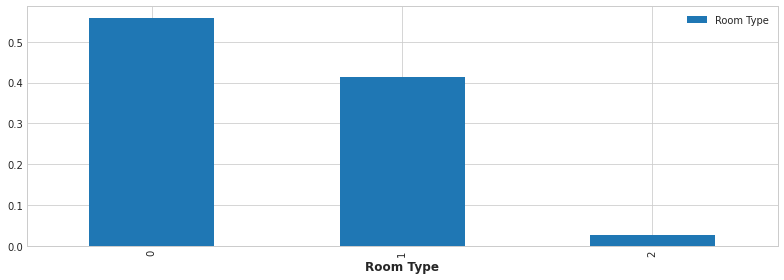

In [251]:
roomtype_c = X.groupby('Room Type')[['Room Type']].count()/30477
roomtype_c.plot(kind='bar')

In [252]:
roomtype_c

,Room Type
Room Type,
0,0.558552
1,0.413722
2,0.027726


y=Room Type으로 주고 MI를 구해도 그닥 상관관계가 강한 feature는 없다.

In [219]:
mi_scores = make_mi_scores(X_, y, discrete_features)
mi_scores[:]  # show a few features with their MI scores

Price                   0.325156
Beds                    0.092337
Zipcode                 0.063819
Number Of Reviews       0.021626
Neighbourhood           0.015447
Property Type           0.013607
Review Scores Rating    0.010354
Name: MI Scores, dtype: float64

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_clf = RandomForestClassifier(random_state=123)

params = { "max_depth":[3,6,8,10,16,20, 24], 'min_samples_split':[16,24]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_, y)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 최고 평균 정확도 수치: 0.8415
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16, 'min_samples_split': 16}


In [239]:
pd.DataFrame(grid_cv.cv_results_).sort_values('rank_test_score')[['param_max_depth','param_min_samples_split','mean_test_score','rank_test_score']]

,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
8,16,16,0.841520,1
13,24,24,0.839682,2
10,20,16,0.839584,3
9,16,24,0.839420,4
12,24,16,0.839256,5
7,10,24,0.838829,6
11,20,24,0.838763,7
6,10,16,0.838402,8
4,8,16,0.837516,9
5,8,24,0.836926,10


Text(0.5, 1.0, 'RandomFrest: Important feature ranking')

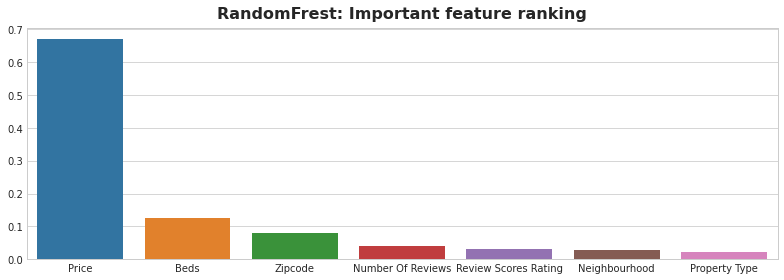

In [244]:
ft_importance = pd.Series(grid_cv.best_estimator_.feature_importances_, index=X_.columns).sort_values(ascending=False)
ft_importance.index
ax = sns.barplot(y=ft_importance, x=ft_importance.index)
plt.title('RandomFrest: Important feature ranking')

랜덤포레스트 분류기에서 제일 학습값이 없는 클래스 '2'의 accuracy를 살펴봄.
- train데이터의 결과를 보긴 했지만 결과분류가 85% 정확도면 랜덤포레스트 모델은 클래스간 불균형에도 강하다는 거네..와

In [257]:
X_type2 = X.copy()
X_type2 = X_type2[X_type2['Room Type'] == 2]
X_type2.pop('Room Type')

30       2
31       2
78       2
79       2
102      2
        ..
30413    2
30414    2
30415    2
30428    2
30463    2
Name: Room Type, Length: 845, dtype: int64

In [1]:
1

1

In [263]:
pred_type_2 = rf_clf.predict(X_type2)

unique, counts = np.unique(pred_type_2, return_counts=True)
dict(zip(unique, counts))
#726/845

{0: 29, 1: 90, 2: 726}

## eval 함수 (이진분류) 

In [265]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가지표 출력하는 함수 설정
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=23)


params = {'learning_rate':[0.1,0.05,0.01], 'max_depth':[3,6,8,10,16,20,24]}
xgb_wrapper = XGBClassifier(n_estimators=1000)
grid_cv = GridSearchCV(xgb_wrapper,param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
# xgb_wrapper.fit(X_train, y_train)
# w_pred = xgb_wrapper.predict(X_test)

# acc = accuracy_score(y_test, w_pred)
# print('XGB 모델 정확도: {0:.4f}'.format(acc))

In [269]:
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.8517
GridSearchCV 최적 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 3}


## class 불균형 맞추기 위한 오버샘플링 후 다시 학습해보기
- 

In [273]:
from imblearn.over_sampling import SMOTE

In [276]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('적용 전 train 데이터 크기: ', X_train.shape, y_train.shape)
print('적용 후 train 데이터 크기: ', X_train_over.shape, y_train_over.shape)

적용 전 train 데이터 크기:  (24381, 7) (24381,)
적용 후 train 데이터 크기:  (40887, 7) (40887,)


워후 클래스간 크기 다 같아짐.

In [277]:
unique, counts = np.unique(y_train_over, return_counts=True)
dict(zip(unique, counts))

{0: 13629, 1: 13629, 2: 13629}

In [280]:
rf_clf = RandomForestClassifier(random_state=123)

params = { "max_depth":[24, 30,], 'min_samples_split':[16,24]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train_over, y_train_over)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 최고 평균 정확도 수치: 0.8523
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 24, 'min_samples_split': 16}


In [286]:
#grid_cv.best_estimator_.fit(X_train_over,y_train_over)
pred_over = grid_cv.best_estimator_.predict(X_test)
acc = accuracy_score(y_test,pred_over)
print('오버샘플링 후 XGBboost 베스트모델로 fit후 예측 acc: {0:.4f}'.format(acc))

오버샘플링 후 XGBboost 베스트모델로 fit후 예측 acc: 0.8153


In [287]:
# pandas 에서 엑셀 불러오게
#! pip install openpyxl

In [168]:
# 220114금
#! pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 173.5 MB 8.4 MB/s            
